In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cars = pd.read_csv('car_prices_cleaned.csv')
cars.head()
cars.shape

(548412, 16)

# BAR PLOT

In [36]:
top5 = cars['make'].value_counts()[:5].reset_index()
top5count = top5['make']
top5count

0         Ford
1    Chevrolet
2       Nissan
3       Toyota
4        Dodge
Name: make, dtype: object

In [4]:
top5s = cars.groupby(by= 'make').agg({'sellingprice':'mean'}).reset_index().sort_values(by ='sellingprice', ascending = False)
top5s = top5s.loc[top5s['make'].isin(top5['make'])]
top5sales = top5s['make']
top5sales

18         Ford
62       Toyota
9     Chevrolet
48       Nissan
12        Dodge
Name: make, dtype: object

### Two Sub Plots - Total Count and Mean of Selling Price

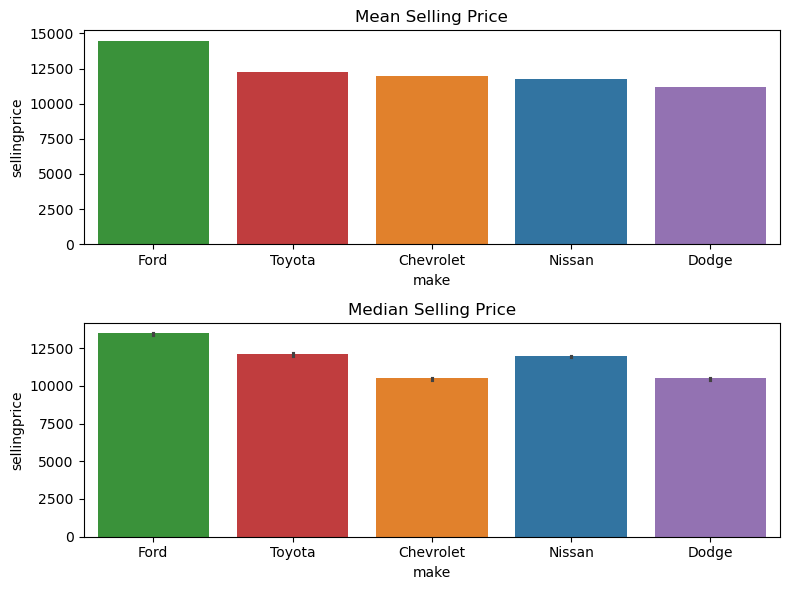

In [42]:
fig, ax = plt.subplots(2, figsize = (8,6)) 

sns.barplot(data = cars.query("make in @top5count"), x='make', y = 'sellingprice', estimator = 'mean', hue = 'make', errorbar=None, order = top5sales, ax = ax[0])
ax[0].tick_params(axis='x', rotation=0)
ax[0].set_title('Mean Selling Price')

sns.barplot(data = cars.query("make in @top5count"), x='make', y = 'sellingprice', estimator = np.median, hue = 'make', order = top5sales, ax = ax[1])
ax[1].tick_params(axis='x', rotation=0)
ax[1].set_title('Median Selling Price')

plt.tight_layout()
plt.show()

### Grouped bar chart - one categoric variable and two numeric variables

In [6]:
top5df = cars.query("make in @top5count")

In [7]:
counts = top5df.groupby(by='make').size().reset_index()
counts

,make,0
0,Chevrolet,60587
1,Dodge,30955
2,Ford,93997
3,Nissan,54017
4,Toyota,39966


In [8]:
sum = top5df.groupby(by='make')['sellingprice'].mean().reset_index()
sum

,make,sellingprice
0,Chevrolet,11939.359087
1,Dodge,11164.101728
2,Ford,14496.084790
3,Nissan,11731.562379
4,Toyota,12237.650128


In [9]:
countsum = pd.merge(counts, sum, on = 'make', how = 'left')
countsum.rename({0:'count'}, axis = 1, inplace = True)
countsum

,make,count,sellingprice
0,Chevrolet,60587,11939.359087
1,Dodge,30955,11164.101728
2,Ford,93997,14496.084790
3,Nissan,54017,11731.562379
4,Toyota,39966,12237.650128


In [10]:
melt = pd.melt(countsum, id_vars='make', value_vars= ['count', 'sellingprice'])
melt

,make,variable,value
0,Chevrolet,count,60587.000000
1,Dodge,count,30955.000000
2,Ford,count,93997.000000
3,Nissan,count,54017.000000
4,Toyota,count,39966.000000
5,Chevrolet,sellingprice,11939.359087
6,Dodge,sellingprice,11164.101728
7,Ford,sellingprice,14496.084790
8,Nissan,sellingprice,11731.562379
9,Toyota,sellingprice,12237.650128


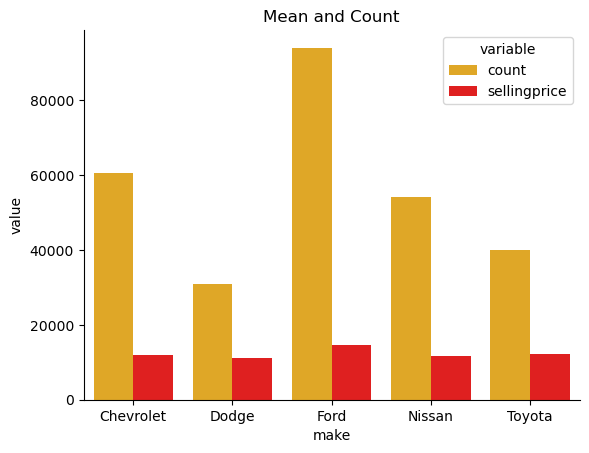

In [11]:
ax = sns.barplot(melt, x = 'make', y = 'value', hue = 'variable', palette= sns.color_palette(['#feb308','#FF0000']))
ax.set_title('Mean and Count')
ax.tick_params(axis = 'x', rotation = 0)
sns.despine()

### Grouped bar chart - two categoric variable and one numeric variables

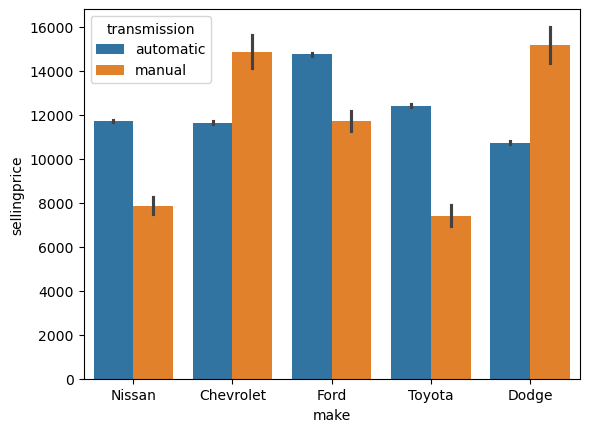

In [12]:
ax = sns.barplot(top5df.query("transmission != 'unknown'"), x = 'make', y = 'sellingprice', estimator = 'mean', hue = 'transmission')

In [13]:
top5df.groupby(['make', 'transmission'])['sellingprice'].mean()

make       transmission
Chevrolet  automatic       11647.636292
           manual          14864.848485
           unknown         14399.252869
Dodge      automatic       10733.611737
           manual          15169.490132
           unknown         14162.258065
Ford       automatic       14747.341265
           manual          11729.805915
           unknown         13220.179909
Nissan     automatic       11732.395469
           manual           7861.606383
           unknown         12122.997717
Toyota     automatic       12406.287642
           manual           7416.391185
           unknown         11589.008652
Name: sellingprice, dtype: float64

### Customization - edit colors and add values inside the chart

C:\Users\Arun\AppData\Local\Temp\ipykernel_13856\929602189.py:1: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  ax = sns.countplot(data = top5df, x='make', hue = 'make', order = top5count, palette= sns.color_palette(['#FF0000']), edgecolor = 'black')


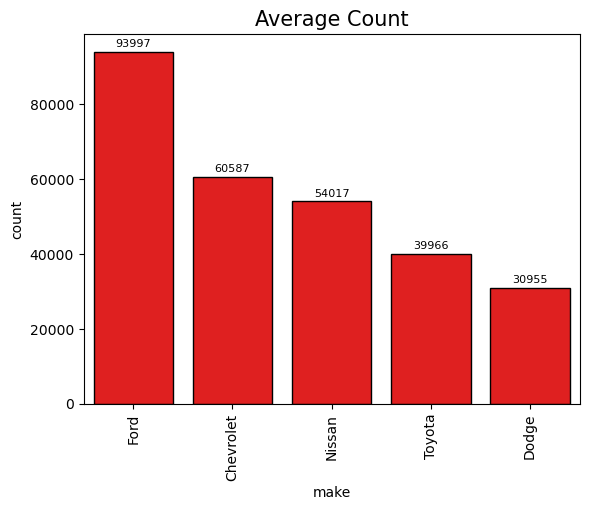

In [14]:

ax = sns.countplot(data = top5df, x='make', hue = 'make', order = top5count, palette= sns.color_palette(['#FF0000']), edgecolor = 'black')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 2),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_title('Average Count', fontsize = 15)
plt.show()

---

# COUNT PLOT

In [20]:
model = top5df['model'].value_counts().nlargest(n = 5).index
model

Index(['Altima', 'F-150', 'Fusion', 'Camry', 'Escape'], dtype='object', name='model')

### Count Plot to compare distribution of a category inside another category - model in make

<Axes: xlabel='make', ylabel='count'>

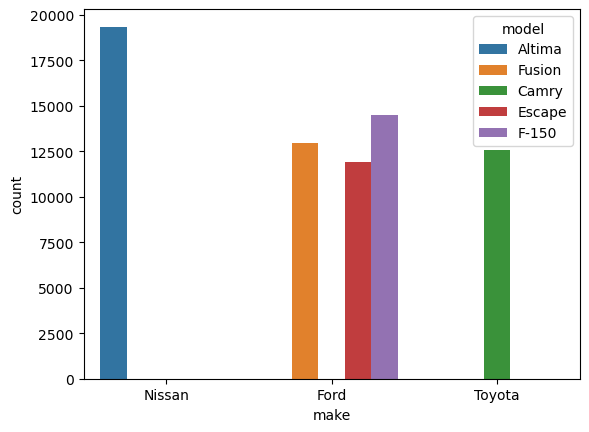

In [21]:
sns.countplot(data = top5df.query("model in @model"), x = 'make', hue = 'model')

---

# HISTPLOT

### Distribution of a numerical variable

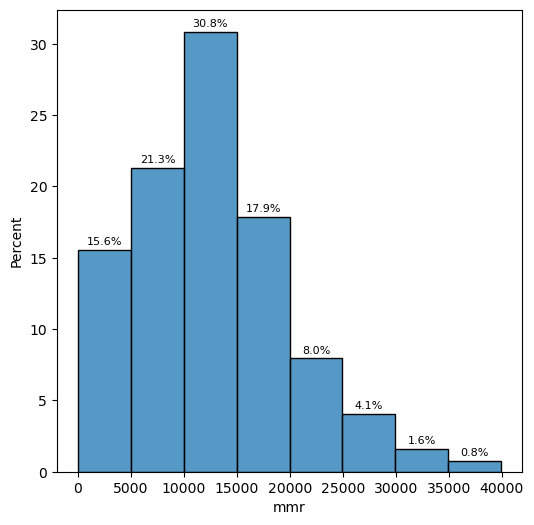

In [15]:
fig, ax = plt.subplots(1, figsize = (6,6))
ax = sns.histplot(data = top5df.query("mmr < 40000"), x = 'mmr', bins = 10, binwidth=5000, stat = 'percent')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                xy=(p.get_x() + p.get_width() / 2., height), 
                xytext=(0, 2),  
                textcoords="offset points",
                ha='center', va='bottom', fontsize=8)

### Distribution of a numerical variable based on category (Histplot in FacetGrid is a better option)

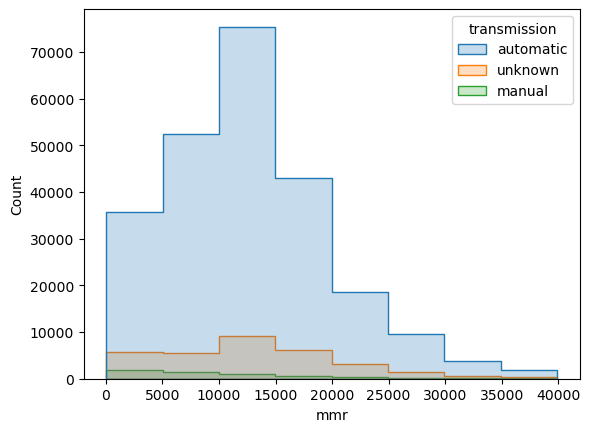

In [16]:
ax = sns.histplot(data = top5df.query("mmr < 40000"), x = 'mmr', bins = 10, binwidth=5000, hue = 'transmission', element = 'step')

---

# Box Plot

### 1 categorical variable

<Axes: xlabel='make', ylabel='mmr'>

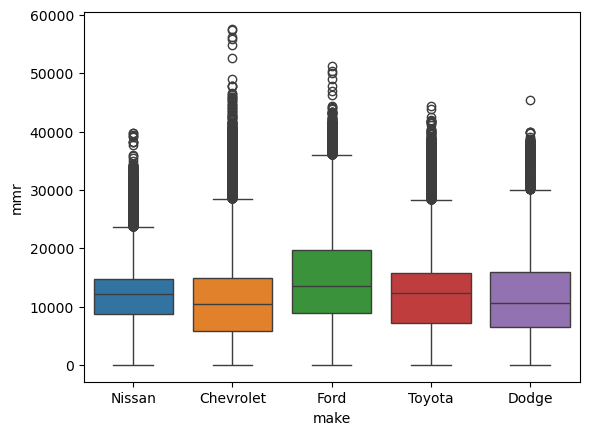

In [17]:
sns.boxplot(data = top5df.query("sellingprice < 40000"), x = 'make', hue = 'make', y = 'mmr')

### 2 categorical variables

<Axes: xlabel='make', ylabel='mmr'>

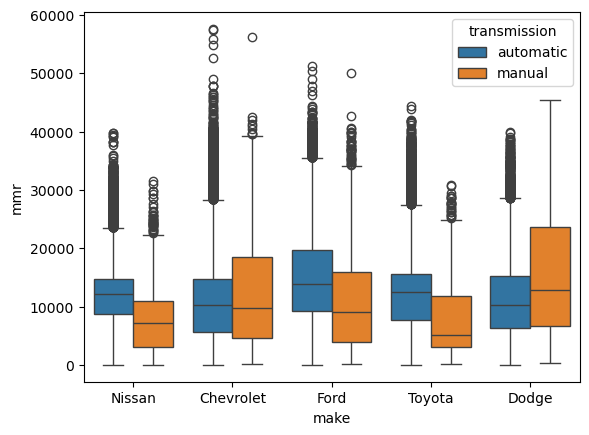

In [18]:
sns.boxplot(data = top5df.query("(sellingprice < 40000) & (transmission != 'unknown')"), x = 'make', y = 'mmr', hue = 'transmission')

### 3 categorical variables

c:\Users\Arun\anaconda3\envs\py4viz\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Arun\anaconda3\envs\py4viz\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Arun\anaconda3\envs\py4viz\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


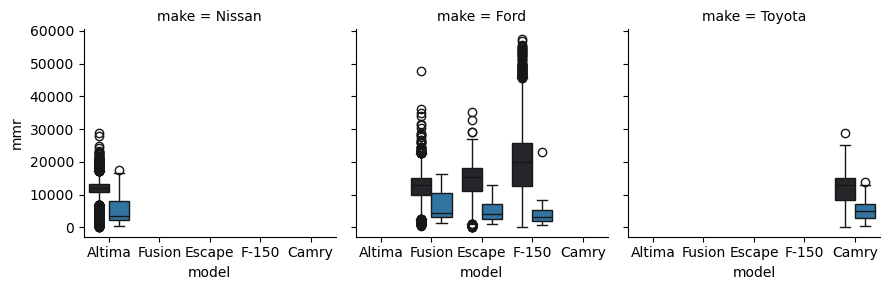

In [19]:
model = ['Altima', 'F-150', 'Fusion', 'Camry','Escape']
g = sns.FacetGrid(data = top5df.query("(model in @model) & (transmission != 'unknown')"), col = 'make', col_wrap=3, palette='vlag')
g.map_dataframe(sns.boxplot, x ='model', y = 'mmr', hue = 'transmission')

---

# VIOLIN PLOT

###  Visualize the distribution of a box plot effectively

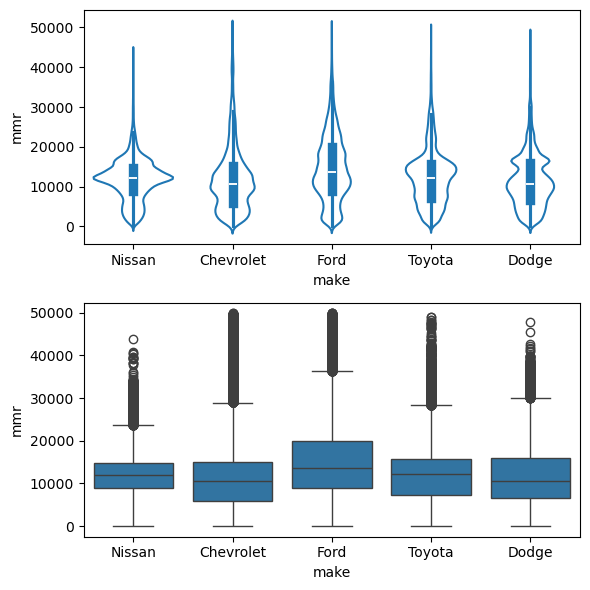

In [25]:
fig, ax = plt.subplots(2, figsize = (6,6))
ax[0] = sns.violinplot(data = top5df.query("mmr < 50000"), x = 'make', y = 'mmr', ax = ax[0], fill=False)
ax[1] = sns.boxplot(data = top5df.query("mmr < 50000"), x = 'make', y = 'mmr', ax = ax[1])
plt.tight_layout()
plt.show()

# LMPLOT

### Distribution of 2 numerical variable across a category

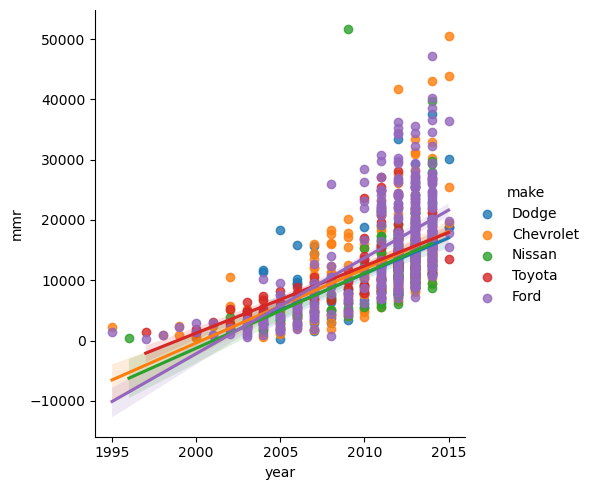

In [26]:
sns.lmplot(data = top5df.sample(1000), y= 'mmr', x ='year', hue ='make')

### Slope of the lmplot

In [27]:
import scipy.stats as stats

stats.linregress(top5df['year'], top5df['mmr'])

LinregressResult(slope=1291.414121709863, intercept=-2583468.5943406173, rvalue=0.6250731777043413, pvalue=0.0, stderr=3.050267591584608, intercept_stderr=6132.483240867436)

In [28]:
for category in top5df['make'].unique():
    filtered = top5df.loc[top5df['make'] == category]
    print(f"{category}: {stats.linregress(filtered['year'], filtered['mmr'])[0:2]}")

Nissan: (1127.2763157655743, -2254936.4596580965)
Chevrolet: (1295.37688316023, -2591633.534467102)
Ford: (1458.9884406914905, -2919077.8560226075)
Toyota: (1134.6781309105859, -2268174.146458254)
Dodge: (1228.1163033044706, -2457630.665602642)


### Distribution of 2 numerical variable across 2 categories - hue and col (Use col for variable that have less values)

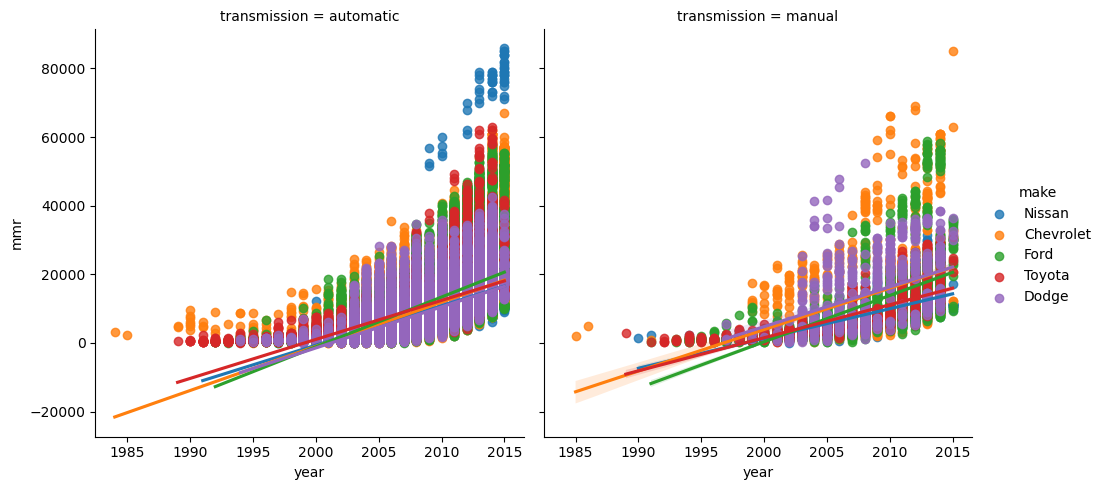

In [29]:
sns.lmplot(data = top5df.query("transmission != 'unknown'"), y= 'mmr', x ='year', col ='transmission', hue ='make')

# JOINT PLOT

### No category with kind = 'hex'

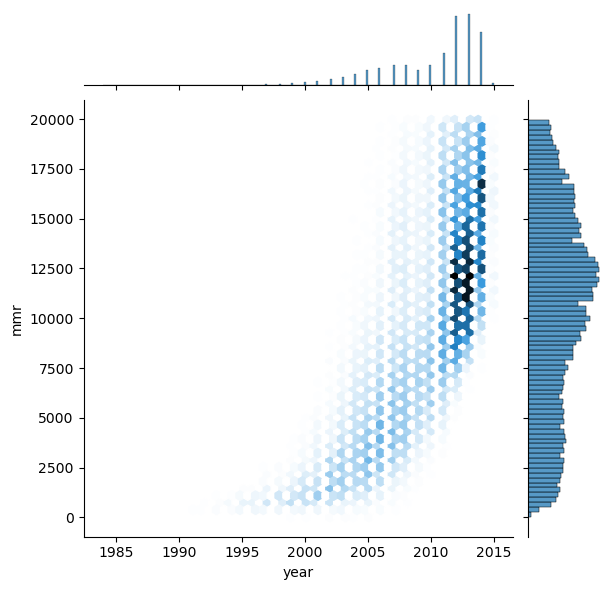

In [30]:
sns.jointplot(data = top5df.query("mmr < 20000"), y= 'mmr', x ='year', kind = 'hex')

### 1 category using hue

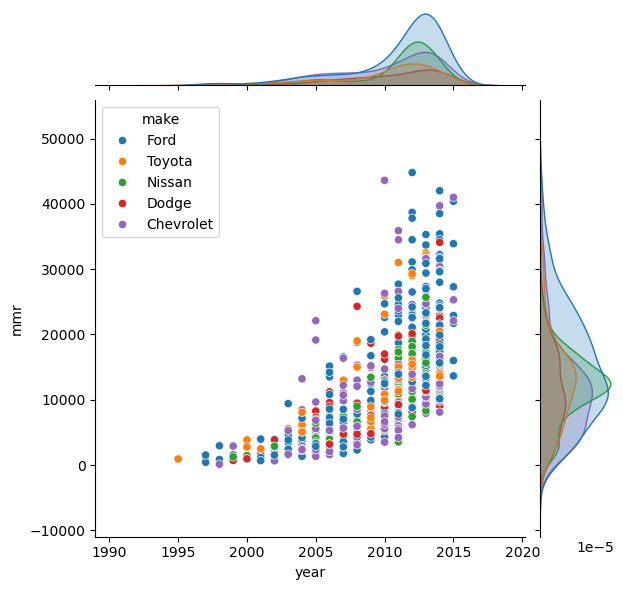

In [31]:
sns.jointplot(data = top5df.sample(1000), y= 'mmr', x ='year', hue = 'make')

# HEAT MAP

### Correlation of all numerical variables

<Axes: >

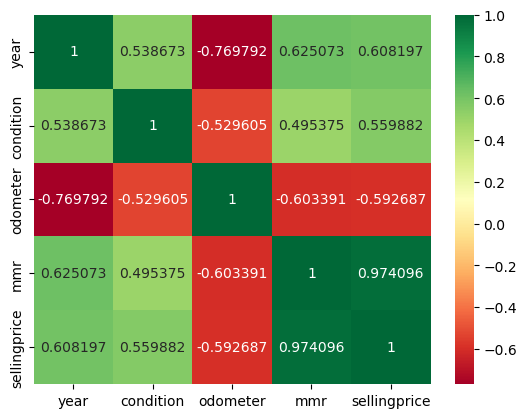

In [32]:
sns.heatmap(data = top5df.corr(numeric_only=True), annot=True, fmt = 'g', cmap = "RdYlGn")

### Aggregation of two categorical variables (Numeric is converted to category using pd.cut)

C:\Users\Arun\AppData\Local\Temp\ipykernel_13856\4141211702.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  top5modp = top5mod.pivot_table(index = 'model', columns = 'condition_bins',values='mmr', aggfunc= 'mean')


<Axes: xlabel='condition_bins', ylabel='model'>

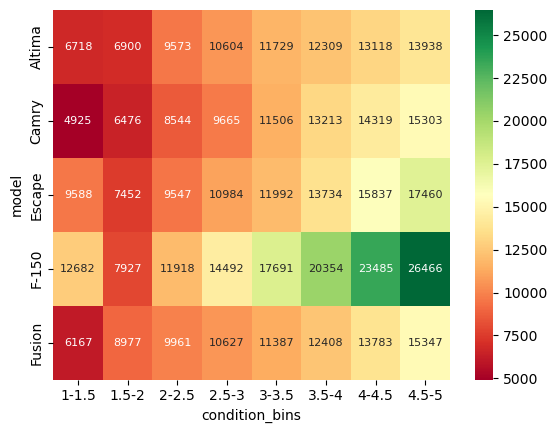

In [33]:
bins = np.linspace(1, 5, 9)
labels = ['1-1.5','1.5-2', '2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
cars['condition_bins'] = pd.cut( x = cars['condition'], bins = bins, labels= labels)
top5 = cars['model'].value_counts().nlargest(5).index
top5mod = cars.query("model in @top5")
top5modp = top5mod.pivot_table(index = 'model', columns = 'condition_bins',values='mmr', aggfunc= 'mean')
sns.heatmap(data = top5modp, cmap = 'RdYlGn', fmt = '.0f', annot=True, annot_kws={"size": 8})

### Find missing values or groupby of categories:

<Axes: xlabel='model', ylabel='make'>

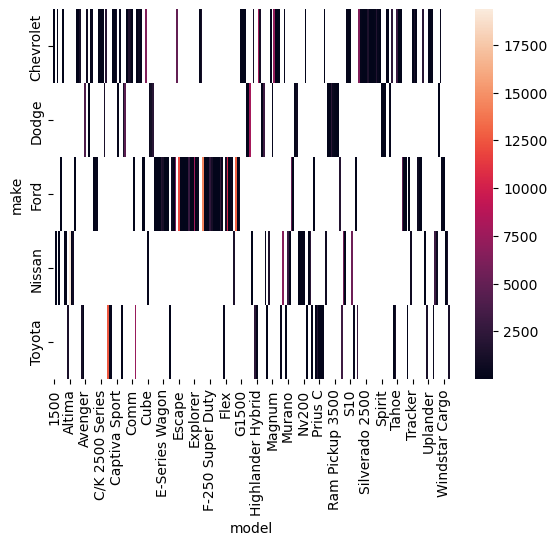

In [34]:
pivot = top5df.pivot_table(index = 'make', columns = 'model', values= 'mmr', aggfunc = 'count')
sns.heatmap(pivot)